Tarefa de aprofundamento - trilha 4 - Luisa Centofanti - 92101399

Inicialmente transformou-se o arquivo de extensão .ods em excel

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
from google.colab import files
uploaded = files.upload()

Saving tab.T4.xlsm to tab.T4 (4).xlsm


In [82]:
# importando io para carregar o arquivo
import io

In [83]:
#importando arquivo
data = pd.read_excel(io.BytesIO(uploaded['tab.T4.xlsm']))

In [84]:
data.head()

,GRANDE_REG,COD_UF,SIGLA_UF,COD,NOME,TIPO,COD_CAT_ASSOC,CAT_ASSOC,COD_MUN,NOME_MUN,LEG,DATA
0,Centro-Oeste,53,DF,5301,Região Integrada de Desenvolvimento do Distrit...,RIDE,530101,NÃO TEM,5300108,BRASÍLIA,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,1998-02-19
1,Centro-Oeste,52,GO,5202,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5200100,ABADIÂNIA,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,1998-02-19
2,Centro-Oeste,52,GO,5202,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5200175,ÁGUA FRIA DE GOIÁS,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,1998-02-19
3,Centro-Oeste,52,GO,5202,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5200258,ÁGUAS LINDAS DE GOIÁS,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,1998-02-19
4,Centro-Oeste,52,GO,5202,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5200308,ALEXÂNIA,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,1998-02-19


In [86]:
#apagando coluna data
data=data.drop(columns=['DATA'])
data.head()

,GRANDE_REG,COD_UF,SIGLA_UF,COD,NOME,TIPO,COD_CAT_ASSOC,CAT_ASSOC,COD_MUN,NOME_MUN,LEG
0,Centro-Oeste,53,DF,5301,Região Integrada de Desenvolvimento do Distrit...,RIDE,530101,NÃO TEM,5300108,BRASÍLIA,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...
1,Centro-Oeste,52,GO,5202,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5200100,ABADIÂNIA,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...
2,Centro-Oeste,52,GO,5202,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5200175,ÁGUA FRIA DE GOIÁS,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...
3,Centro-Oeste,52,GO,5202,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5200258,ÁGUAS LINDAS DE GOIÁS,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...
4,Centro-Oeste,52,GO,5202,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5200308,ALEXÂNIA,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...


In [87]:
# mostrando informações do conjunto de dados importado
data.info

<bound method DataFrame.info of         GRANDE_REG  ...                                                LEG
0     Centro-Oeste  ...  DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...
1     Centro-Oeste  ...  DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...
2     Centro-Oeste  ...  DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...
3     Centro-Oeste  ...  DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...
4     Centro-Oeste  ...  DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...
...            ...  ...                                                ...
1415           Sul  ...                               Lei Complementar 162
1416           Sul  ...                               Lei Complementar 162
1417           Sul  ...                               Lei Complementar 162
1418           Sul  ...                               Lei Complementar 162
1419           Sul  ...                               Lei Complementar 162

[1420 rows x 11 columns]>

In [88]:
# mostrando tipo do conjunto de dados
display(data.dtypes)

GRANDE_REG       object
COD_UF            int64
SIGLA_UF         object
COD               int64
NOME             object
TIPO             object
COD_CAT_ASSOC    object
CAT_ASSOC        object
COD_MUN           int64
NOME_MUN         object
LEG              object
dtype: object

In [89]:
#porcentagem de faltantes
(data.isnull().sum() / data.shape[0]).sort_values(ascending=False)

LEG              0.0
NOME_MUN         0.0
COD_MUN          0.0
CAT_ASSOC        0.0
COD_CAT_ASSOC    0.0
TIPO             0.0
NOME             0.0
COD              0.0
SIGLA_UF         0.0
COD_UF           0.0
GRANDE_REG       0.0
dtype: float64

#Nenhum dado faltante!

In [90]:
# Remove linhas duplicadas
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1419
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   GRANDE_REG     1420 non-null   object
 1   COD_UF         1420 non-null   int64 
 2   SIGLA_UF       1420 non-null   object
 3   COD            1420 non-null   int64 
 4   NOME           1420 non-null   object
 5   TIPO           1420 non-null   object
 6   COD_CAT_ASSOC  1420 non-null   object
 7   CAT_ASSOC      1420 non-null   object
 8   COD_MUN        1420 non-null   int64 
 9   NOME_MUN       1420 non-null   object
 10  LEG            1420 non-null   object
dtypes: int64(3), object(8)
memory usage: 133.1+ KB


In [91]:
#Cria coluna para indicar non-null
data = pd.get_dummies(data, columns=['GRANDE_REG'])
data = pd.get_dummies(data, columns=['SIGLA_UF'])
data = pd.get_dummies(data, columns=['NOME'])
data = pd.get_dummies(data, columns=['TIPO'])
data = pd.get_dummies(data, columns=['CAT_ASSOC'])
data = pd.get_dummies(data, columns=['COD_CAT_ASSOC'])
data = pd.get_dummies(data, columns=['NOME_MUN'])
data = pd.get_dummies(data, columns=['LEG'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1419
Columns: 1782 entries, COD_UF to LEG_inclusão de município - Lei Complementar  78 de 25.03.2010
dtypes: int64(3), uint8(1779)
memory usage: 2.5 MB


In [92]:
# Remove linhas com non-null
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1419
Columns: 1782 entries, COD_UF to LEG_inclusão de município - Lei Complementar  78 de 25.03.2010
dtypes: int64(3), uint8(1779)
memory usage: 2.5 MB


In [93]:
X=data.values
X.shape

(1420, 1782)

In [94]:
#distribuição estatística
data.describe()

,COD_UF,COD,COD_MUN,GRANDE_REG_Centro-Oeste,GRANDE_REG_Nordeste,GRANDE_REG_Norte,GRANDE_REG_Sudeste,GRANDE_REG_Sul,SIGLA_UF_AL,SIGLA_UF_AM,SIGLA_UF_AP,SIGLA_UF_BA,SIGLA_UF_CE,SIGLA_UF_DF,SIGLA_UF_ES,SIGLA_UF_GO,SIGLA_UF_MA,SIGLA_UF_MG,SIGLA_UF_MT,SIGLA_UF_PA,SIGLA_UF_PB,SIGLA_UF_PE,SIGLA_UF_PI,SIGLA_UF_PR,SIGLA_UF_RJ,SIGLA_UF_RN,SIGLA_UF_RO,SIGLA_UF_RR,SIGLA_UF_RS,SIGLA_UF_SC,SIGLA_UF_SE,SIGLA_UF_SP,SIGLA_UF_TO,NOME_Aglomeração Urbana de Franca,NOME_Aglomeração Urbana de Jundiaí,NOME_Aglomeração Urbana de Piracicaba-AU- Piracicaba,NOME_Aglomeração Urbana do Litoral Norte,NOME_Aglomeração Urbana do Sul,NOME_Região Administrativa Integrada de Desenvolvimento do Polo Petrolina/PE e Juazeiro/BA,NOME_Região Integrada de Desenvolvimento da Grande Teresina,...,LEG_Lei Complementar 31,LEG_Lei Complementar 318,LEG_Lei Complementar 32,LEG_Lei Complementar 33,LEG_Lei Complementar 35,LEG_Lei Complementar 359,LEG_Lei Complementar 36,LEG_Lei Complementar 39,LEG_Lei Complementar 40,LEG_Lei Complementar 48,LEG_Lei Complementar 49,LEG_Lei Complementar 523,LEG_Lei Complementar 540,LEG_Lei Complementar 56,LEG_Lei Complementar 571,LEG_Lei Complementar 577,LEG_Lei Complementar 580,LEG_Lei Complementar 59,LEG_Lei Complementar 63,LEG_Lei Complementar 636,LEG_Lei Complementar 64,LEG_Lei Complementar 640,LEG_Lei Complementar 648,LEG_Lei Complementar 72,LEG_Lei Complementar 81,LEG_Lei Complementar 815,LEG_Lei Complementar 83,LEG_Lei Complementar 870,LEG_Lei Complementar 89,LEG_Lei Complementar 90,LEG_Lei Complementar 91,LEG_Lei Complementar 9184,LEG_Lei Complementar 92,LEG_Lei Complementar 93,LEG_Lei Complementar 95,LEG_Lei Complementar Promulgada 495,LEG_Lei Complementar n° 27 - Alterada pela Lei Complementar n° 78 de 25.03.2010,LEG_Lei Complementar nº 163 (Federal),LEG_Lei complem. 026 - Alterada p/ Lei Comp. 056 13.01.2000,LEG_inclusão de município - Lei Complementar 78 de 25.03.2010
count,1420.000000,1420.000000,1.420000e+03,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,...,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000
mean,34.454930,3449.743662,3.459478e+06,0.045070,0.276761,0.051408,0.230986,0.395775,0.058451,0.009155,0.002113,0.023239,0.032394,0.000704,0.004930,0.035211,0.015493,0.057746,0.009155,0.007042,0.111972,0.012676,0.009155,0.136620,0.015493,0.010563,0.001408,0.007746,0.051408,0.207746,0.002817,0.152817,0.023944,0.013380,0.004930,0.016197,0.014085,0.003521,0.005634,0.009859,...,0.011268,0.004930,0.002817,0.003521,0.012676,0.007746,0.004930,0.006338,0.000704,0.004225,0.004225,0.042958,0.000704,0.014789,0.066197,0.001408,0.002817,0.006338,0.000704,0.015493,0.000704,0.000704,0.000704,0.000704,0.004225,0.006338,0.005634,0.013380,0.005634,0.014085,0.001408,0.001408,0.010563,0.012676,0.002817,0.028169,0.007746,0.008451,0.001408,0.003521
std,8.909937,891.706631,8.920921e+05,0.207532,0.447555,0.220907,0.421612,0.489189,0.234676,0.095276,0.045931,0.150716,0.177107,0.026537,0.070062,0.184378,0.123546,0.233346,0.095276,0.083652,0.315443,0.111912,0.095276,0.343566,0.123546,0.102270,0.037516,0.087703,0.220907,0.405837,0.053018,0.359938,0.152928,0.114937,0.070062,0.126278,0.117881,0.059255,0.074873,0.098837,...,0.105586,0.070062,0.0530

Técnica linear para redução da dimensionalidade escolhida: PCA

In [95]:
X= data.values
X

array([[     53,    5301, 5300108, ...,       0,       0,       0],
       [     52,    5202, 5200100, ...,       0,       0,       0],
       [     52,    5202, 5200175, ...,       0,       0,       0],
       ...,
       [     42,    4202, 4207502, ...,       0,       0,       0],
       [     42,    4202, 4213203, ...,       0,       0,       0],
       [     42,    4202, 4218202, ...,       0,       0,       0]])

In [96]:
#importando biblioteca
from sklearn.decomposition import PCA

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaler = scaler.transform(X)
X_scaler

array([[ 2.08212519,  2.07681368,  2.06400012, ..., -0.09231862,
        -0.03755579, -0.05944383],
       [ 1.96985141,  1.96575151,  1.95185561, ..., -0.09231862,
        -0.03755579, -0.05944383],
       [ 1.96985141,  1.96575151,  1.95193972, ..., -0.09231862,
        -0.03755579, -0.05944383],
       ...,
       [ 0.84711359,  0.84391136,  0.83880051, ..., -0.09231862,
        -0.03755579, -0.05944383],
       [ 0.84711359,  0.84391136,  0.84519336, ..., -0.09231862,
        -0.03755579, -0.05944383],
       [ 0.84711359,  0.84391136,  0.85079901, ..., -0.09231862,
        -0.03755579, -0.05944383]])

In [98]:
#componentes principais do conjunto
X_centered = X - X.mean(axis=0) 
U, s, Vt = np.linalg.svd(X_centered) 
c1 = Vt.T[:, 0] 
c2 = Vt.T[:, 1]


In [99]:
#projeta conjunto
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [108]:
#Calculando variância por PCA
pca = PCA(random_state=2020)
pca.fit(X)
X_pca = pca.transform(X_scaler)
print("variancia todos compontes =", sum(pca.explained_variance_ratio_ * 100))

variancia todos compontes = 99.99999999999613


Text(0, 0.5, 'variancia')

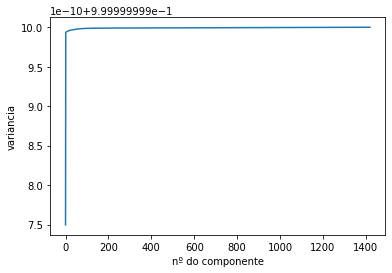

In [109]:
import matplotlib.pyplot as plt 

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('nº do componente')
plt.ylabel('variancia')

In [110]:
pca2Components = PCA(n_components=2, random_state=2020)
pca2Components.fit(X)
X_pca2Components = pca2Components.transform(X_scaler)
valor = sum(pca2Components.explained_variance_ratio_ * 100)
print("Variância 2 componentes: ", valor)

Variância 2 componentes:  99.99999999927691


Text(0, 0.5, 'variância')

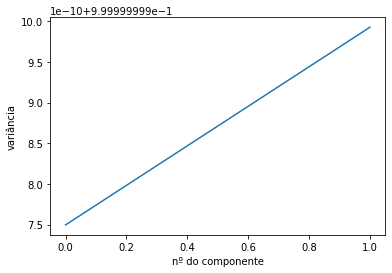

In [111]:
plt.plot(np.cumsum(pca2Components.explained_variance_ratio_))
plt.xlabel('nº do componente')
plt.ylabel('variância')

Técnica não linear para redução da dimensionalidade escolhida: Kernel PCA

---

Exemplo

In [114]:
import pylab as pl

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)

In [126]:
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

In [116]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

Text(0, 0.5, '$x_2$')

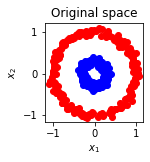

In [118]:
pl.figure()
pl.subplot(2, 2, 1, aspect='equal')
pl.title("Original space")
reds = y == 0
blues = y == 1
pl.plot(X[reds, 0], X[reds, 1], "ro")
pl.plot(X[blues, 0], X[blues, 1], "bo")
pl.xlabel("$x_1$")
pl.ylabel("$x_2$")

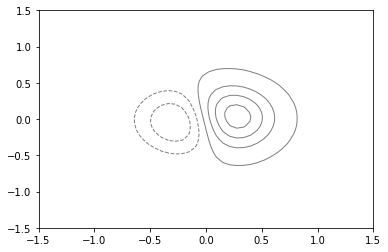

In [119]:
X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
pl.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

Text(0, 0.5, '2nd component')

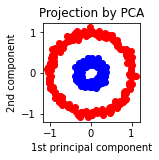

In [120]:
pl.subplot(2, 2, 2, aspect='equal')
pl.plot(X_pca[reds, 0], X_pca[reds, 1], "ro")
pl.plot(X_pca[blues, 0], X_pca[blues, 1], "bo")
pl.title("Projection by PCA")
pl.xlabel("1st principal component")
pl.ylabel("2nd component")

Text(0, 0.5, '2nd component')

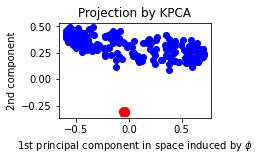

In [121]:
pl.subplot(2, 2, 3, aspect='equal')
pl.plot(X_kpca[reds, 0], X_kpca[reds, 1], "ro")
pl.plot(X_kpca[blues, 0], X_kpca[blues, 1], "bo")
pl.title("Projection by KPCA")
pl.xlabel("1st principal component in space induced by $\phi$")
pl.ylabel("2nd component")

Text(0, 0.5, '$x_2$')

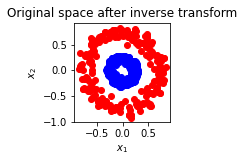

In [122]:
pl.subplot(2, 2, 4, aspect='equal')
pl.plot(X_back[reds, 0], X_back[reds, 1], "ro")
pl.plot(X_back[blues, 0], X_back[blues, 1], "bo")
pl.title("Original space after inverse transform")
pl.xlabel("$x_1$")
pl.ylabel("$x_2$")

In [123]:
pl.subplots_adjust(0.02, 0.10, 0.98, 0.94, 0.04, 0.35)

pl.show()

<Figure size 432x288 with 0 Axes>